# Hand Gesture Recognition

By: M V Nikhitha

## Importing the libraries

In [1]:
import os
from random import randint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import models, layers
from keras.optimizers import Adam
from keras.utils import to_categorical

%matplotlib inline

Creating `lookup_dict` storing the names of the gestures to be identified, and giving each gesture a numerical identifier.

Creating `reverse_lookup_dict` that tells what gesture is associated to a given identifier.

In [2]:
lookup_dict = {}
reverse_lookup_dict = {}
count = 0
for subdir in os.listdir("data/leapGestRecog/00"):
    lookup_dict[subdir] = count
    reverse_lookup_dict[count] = subdir
    count+=1
lookup_dict

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

## Loading the data

In [3]:
X = []
y = []
datacount = 0
for i in range(0, 10):
    for j in os.listdir('data/leapGestRecog/0' + str(i)):
        count = 0
        for k in os.listdir('data/leapGestRecog/0' + str(i) + '/' + j):
            img = Image.open('data/leapGestRecog/0' + str(i) + '/' + j + '/' + k).convert('L')  # grayscale image
            img = img.resize((150, 150))
            arr = np.array(img)
            X.append(arr)
            count = count + 1
        y_values = np.full((count, 1), lookup_dict[j]) 
        y.append(y_values)
        datacount = datacount + count
X = np.array(X, dtype="float32")
y = np.array(y)
y = y.reshape(datacount, 1)

## Visualizing the data

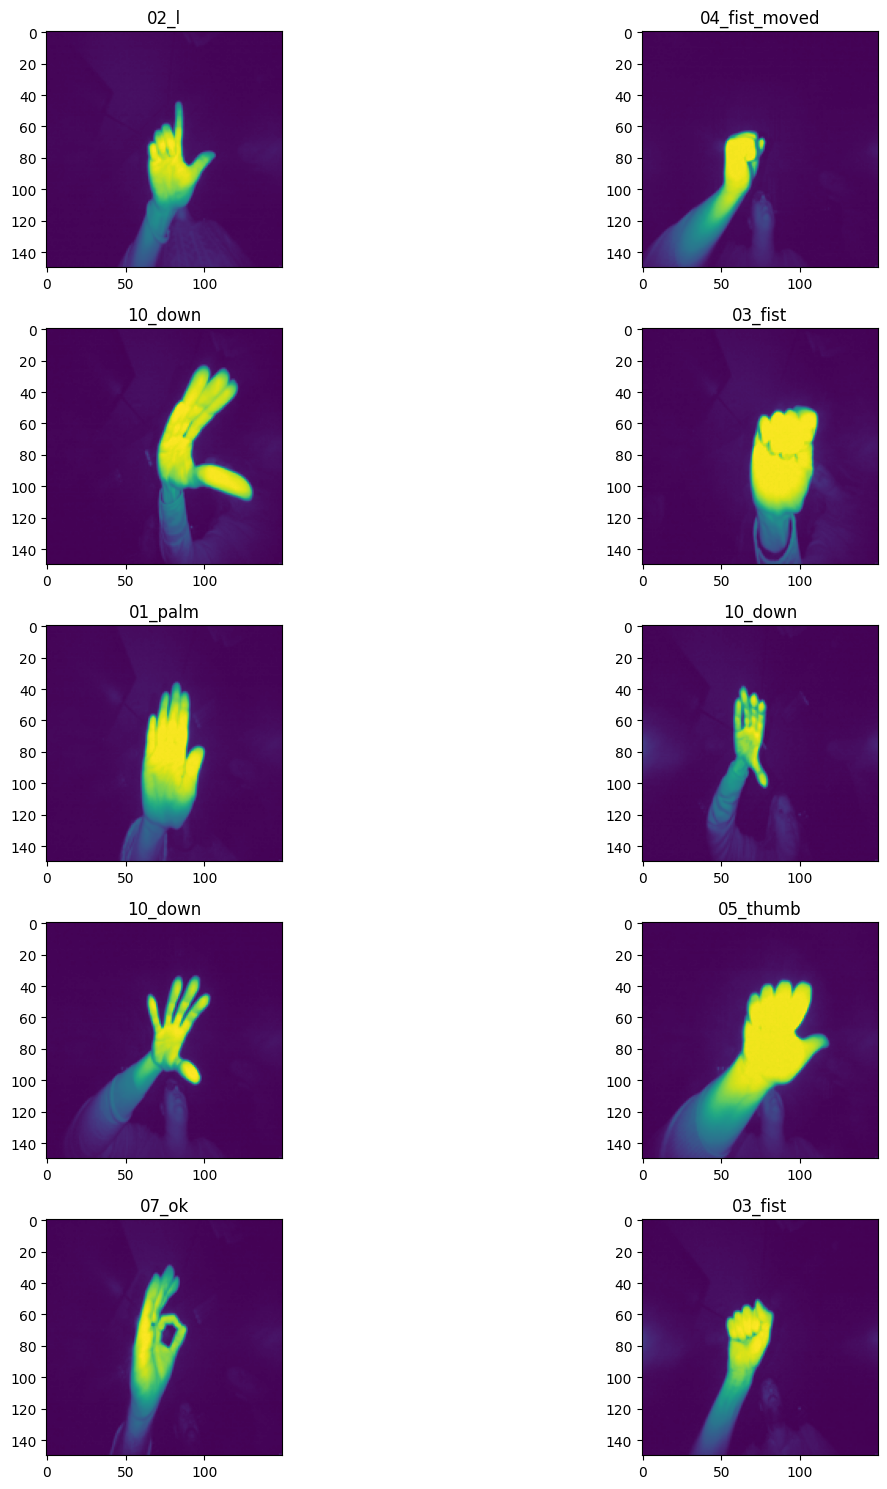

In [4]:
fig,ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)
for i in range(5):
    for j in range (2):
        l = randint(0,len(y))
        ax[i, j].imshow(X[l])
        ax[i, j].set_title(reverse_lookup_dict[y[l, 0]])
        
plt.tight_layout()

Converting the target variable `y` into its one-hot encoded representation.

Reshaping and normalizing the input data.

In [5]:
y = to_categorical(y)
X = X.reshape((datacount, 150, 150, 1))
X /= 255

## Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model Building

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding="Same", activation="relu", input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding="Same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))) 

model.add(layers.Conv2D(filters=96, kernel_size=(3,3), padding="Same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(filters=96, kernel_size=(3,3), padding="Same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation("relu"))
model.add(layers.Dense(10, activation="softmax"))

In [8]:
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1,
    mode='auto'
)

callbacks = [earlystop, learning_rate_reduction]

In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 96)        0

## Visualizing training

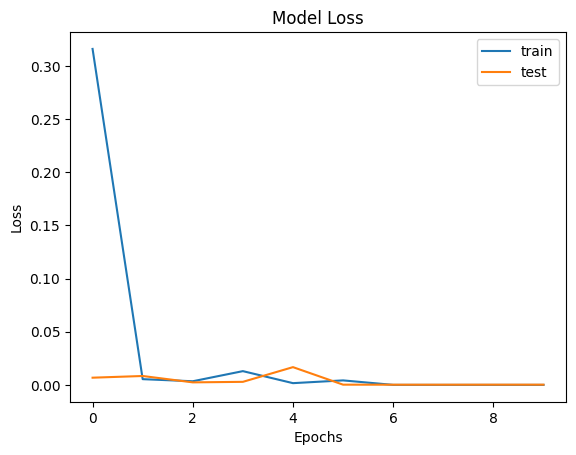

In [12]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

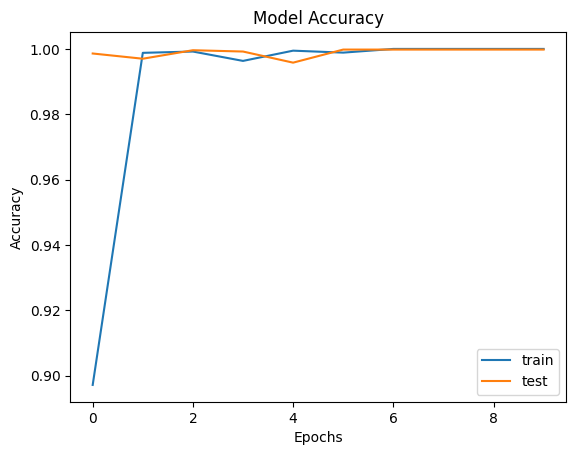

In [13]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()